In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
sns.set()

In [2]:
properties = pd.read_csv("properties_v2.csv", sep=",") 
#pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)

In [3]:
properties.describe()
total_properties = properties["price"].count()

# Removendo bairros de pouca relevância no escopo de dados
Volume menor que 1% dos dados

In [4]:
#for neighbourhood in properties['neighbourhood'].unique():
#    remove_outliers(properties, neighbourhood, "area")
neighbourhood_counts = properties['neighbourhood'].value_counts(normalize=True).to_frame().reset_index()
#print(neighbourhood_counts)
count = 0

neighbourhood_counts

for value in range(len(neighbourhood_counts)):
    count = count + neighbourhood_counts['neighbourhood'].values[value]
    
    if count > 0.99:
        print(neighbourhood_counts['index'].values[value])
        properties = properties.loc[properties['neighbourhood'] != neighbourhood_counts['index'].values[value]]

orleans
santo inacio
cachoeira
tatuquara
umbara
butiatuvinha
cascatinha
sao joao
augusta
campo de santana
taboao
vila oficinas
riviera
caiua
sao miguel
jardim schaffer
ganchinho


# Removendo outliers de preços

Percentual removidos: 7.762 %


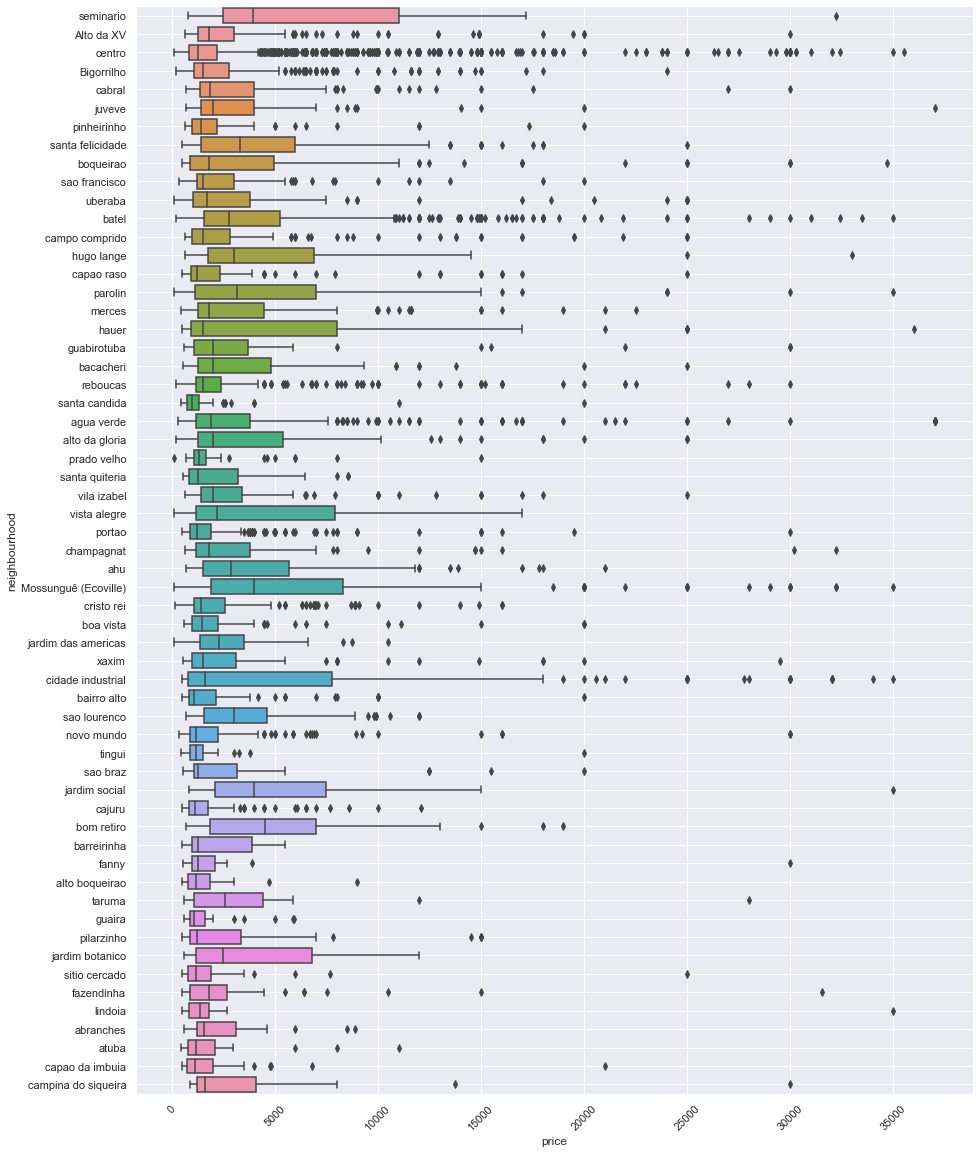

In [5]:
#properties["price"][np.abs(zscore(properties["price"])) > 3.3] = np.nan

properties["price"][np.abs(zscore(properties["price"])) > 3.3] = np.nan


fig, ax = plt.subplots(figsize=(15,20))
sns.boxplot(data=properties[["neighbourhood", "price"]], x="price", y="neighbourhood", ax=ax)
ax.grid(True)
plt.xticks(rotation=45)
print("Percentual removidos:",round(100-(properties["price"].count()/properties["price"].isnull().sum()),3),"%")

<AxesSubplot:>

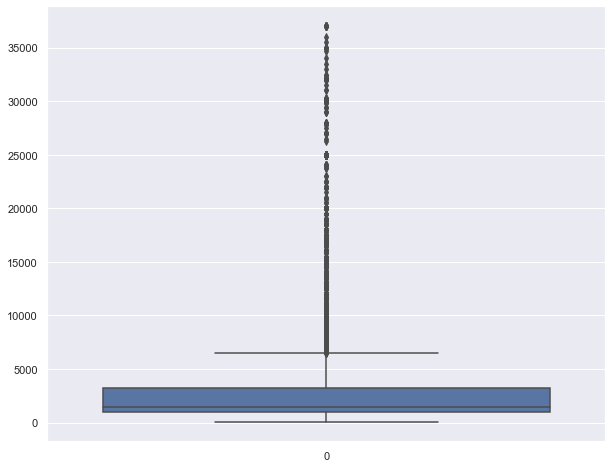

In [6]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=properties["price"], ax=ax)

# Removendo outliers de área

Percentual removidos: 6.865 %


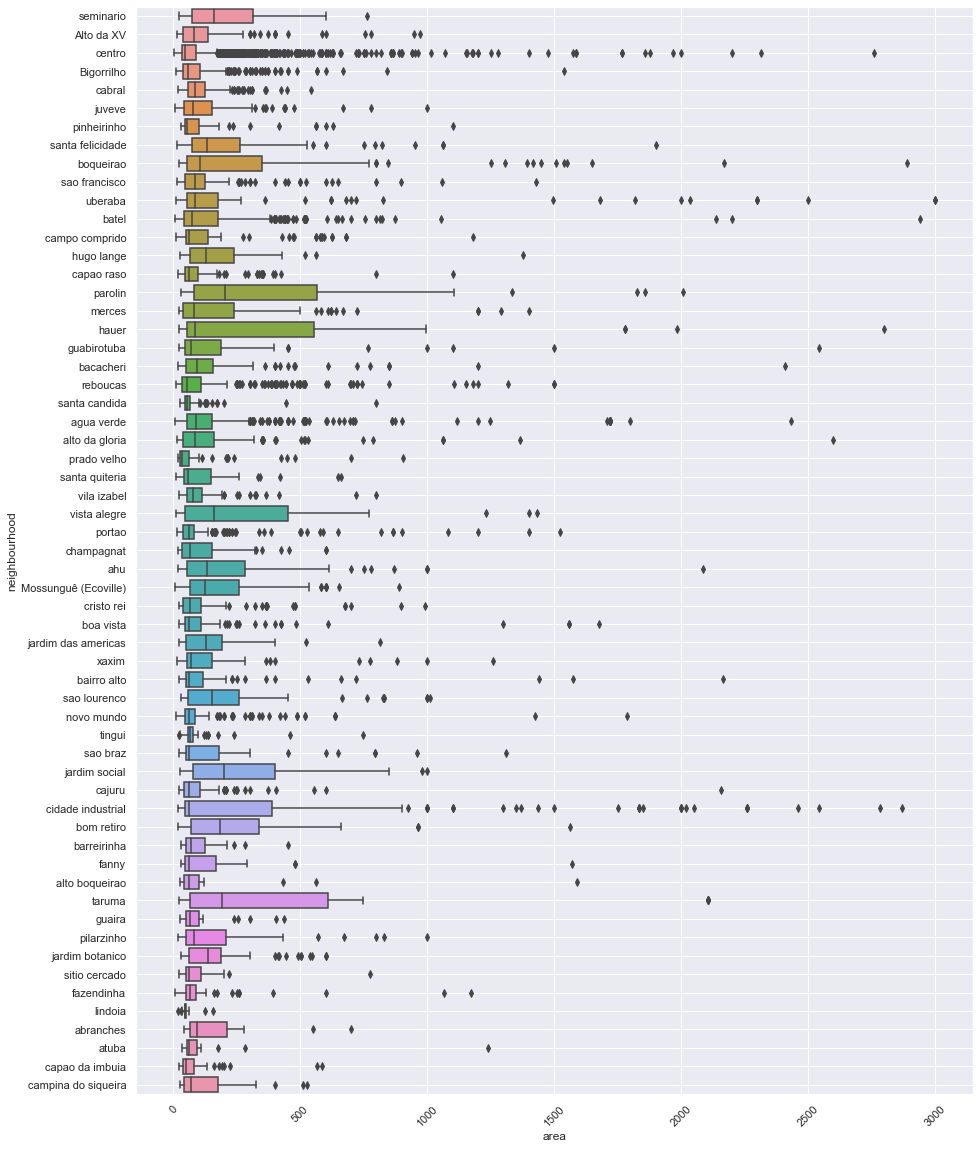

In [7]:
#properties = properties.loc[properties["area"] != 0]
#properties = properties[np.abs(zscore(properties["area"])) < 1.5]


#properties["area"][np.abs(zscore(properties["area"])) > 1] = np.nan
properties["area"][np.abs(zscore(properties["area"])) > 1] = np.nan
properties.loc[properties["area"] == 0] = np.nan
properties.loc[properties["area"] > 3000 ] = np.nan
properties["area"].describe()

fig, ax = plt.subplots(figsize=(15,20))
sns.boxplot(data=properties[["neighbourhood", "area"]], x="area", y="neighbourhood", ax=ax)
ax.grid(True)
plt.xticks(rotation=45)
print("Percentual removidos:",round(100-(properties["area"].count()/properties["area"].isnull().sum()),3),"%")

<AxesSubplot:>

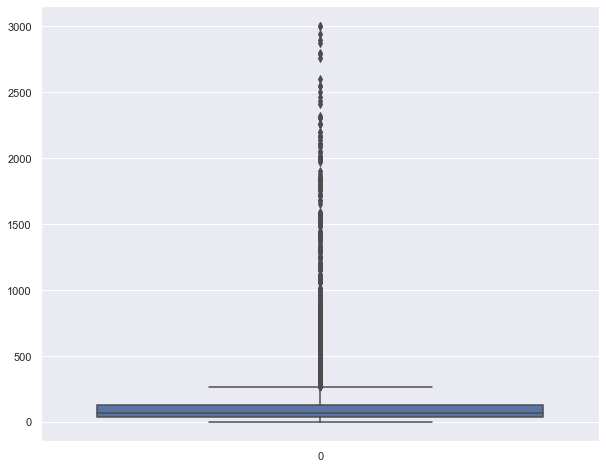

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=properties["area"], ax=ax)

# Entendendo correlações

<AxesSubplot:>

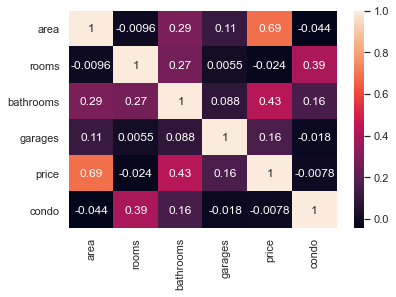

In [9]:
sns.heatmap(properties[["area","rooms","bathrooms","garages","price","condo"]].corr(), annot=True)


Text(0.5, 1.0, 'Area vs Price')

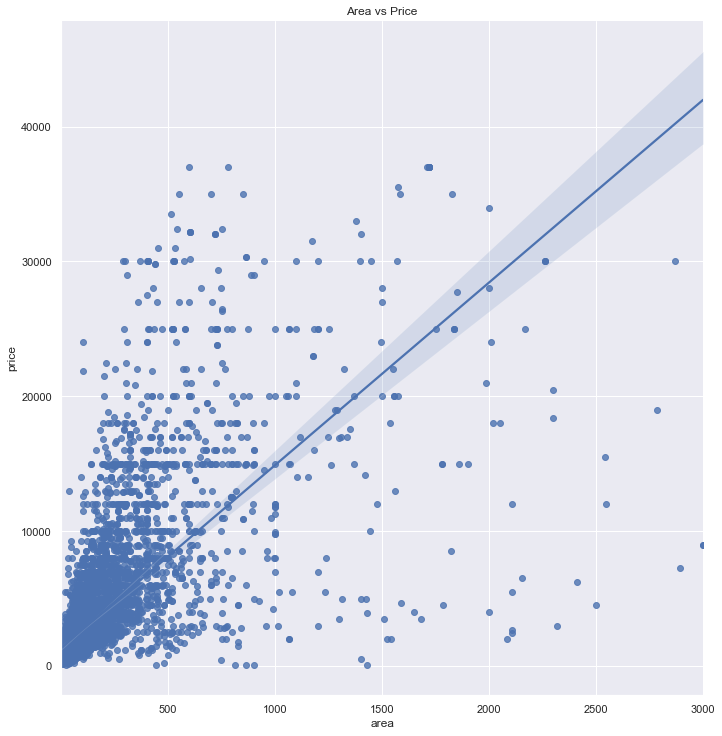

In [10]:
#prices_by_neighborhood = properties.groupby(['neighbourhood'])['price'].count()
#prices_by_neighborhood = prices_by_neighborhood.reset_index()


sns.lmplot(x='area', y='price', data=properties, height=10)
ax = plt.gca()
ax.set_title("Area vs Price")


# Verificando distribuições numéricas

<AxesSubplot:xlabel='price', ylabel='Count'>

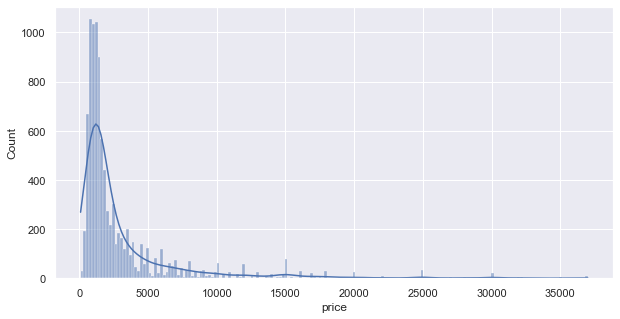

In [11]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=properties, x="price", kde=True, ax=ax)

<AxesSubplot:xlabel='area', ylabel='Count'>

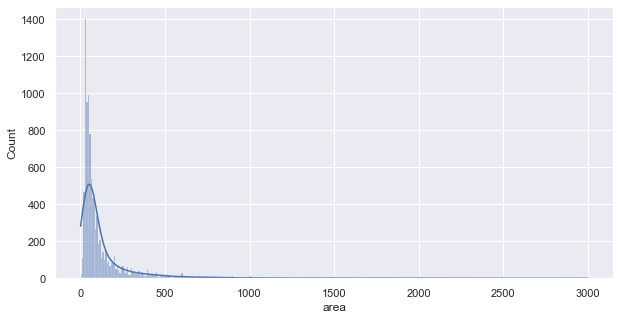

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(data=properties, x="area", kde=True, ax=ax)

In [13]:
#outiliers condominio
#properties = properties[np.abs(zscore(properties["condo"])) < 3]
#sns.histplot(data=properties, x="condo", kde=True)

<AxesSubplot:title={'center':'Number of apartments vs neighbourhood'}, xlabel='count', ylabel='neighbourhood'>

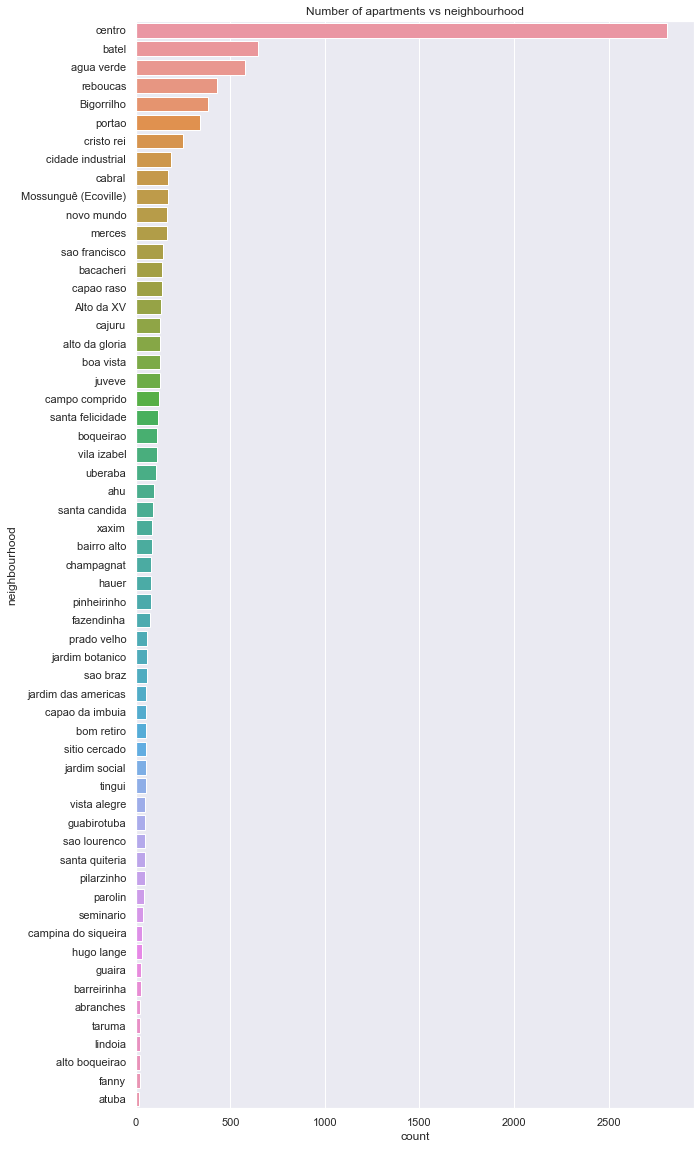

In [14]:
fig, ax = plt.subplots(figsize=(10,20))
ax.set_title("Number of apartments vs neighbourhood")
sns.countplot(data=properties, y="neighbourhood", ax=ax, order=properties['neighbourhood'].value_counts().index)

In [15]:
properties.to_csv("properties_v3.csv", index=False)